In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('D:\Swastick College/7th Sem\Adv Data MIning\ADM LAB\Stock Market Data\ADANIPORTS copy 4.csv', parse_dates=['Date'])
data = data.sort_values(by='Date')

# Select relevant features for normalization and PCA
features = ['Close', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']

# Replace NaN values with the mean of each column
data[features] = data[features].fillna(data[features].mean())

# Normalize the features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[features])

# Apply PCA for feature reduction
pca = PCA(n_components=5)  # Specify the number of principal components
pca_data = pca.fit_transform(normalized_data)

# Display the reduced features
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
print("Reduced Features after PCA:")
print(pca_df.head())

# Explained variance to understand the significance of each principal component
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")


c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Reduced Features after PCA:
        PC1       PC2       PC3       PC4       PC5
0  0.907676  0.099082  0.501118 -0.076810  0.256028
1  0.996894  0.049068  0.023628 -0.030568  0.029732
2  0.940519 -0.083995  0.019247 -0.027254  0.036490
3  0.972796 -0.004991  0.019392 -0.029895  0.039813
4  1.040894  0.008060 -0.009550 -0.031648  0.027608

Explained Variance by each Principal Component:
PC1: 0.7495
PC2: 0.1986
PC3: 0.0419
PC4: 0.0082
PC5: 0.0008


C:\Users\IDEAPAD GAMING\AppData\Local\Temp\ipykernel_13428\467242311.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('D:\Swastick College/7th Sem\Adv Data MIning\ADM LAB\Stock Market Data\ADANIPORTS copy 4.csv', parse_dates=['Date'])


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:/Swastick College/7th Sem/Adv Data MIning/ADM LAB/Stock Market Data/ADANIPORTS copy.csv')

# Convert 'Date' column to datetime and sort by date
data['Date'] = pd.to_datetime(data['Date'])
data['Trades'] = data['Trades'].fillna(data['Trades'].median())  # Handling missing 'Trades' values
data = data.sort_values(by='Date')

# Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# RSI Calculation
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# MACD Calculation
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Drop rows with NaN values generated by rolling calculations
data = data.dropna()

# Display first few rows
data[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line']].head()


C:\Users\IDEAPAD GAMING\AppData\Local\Temp\ipykernel_13428\3500013415.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Close,SMA_20,EMA_20,RSI,MACD,Signal_Line
19,2007-12-26,1199.90,1047.1375,1064.576689,66.074871,42.407648,32.028800
20,2007-12-27,1211.65,1059.5750,1078.583671,63.934426,48.788798,35.380800
21,2007-12-28,1249.10,1077.3350,1094.823321,66.783357,56.219741,39.548588
22,2007-12-31,1268.80,1096.5650,1111.392529,66.690070,62.972533,44.233377
23,2008-01-01,1296.85,1115.3300,1129.055145,72.164948,69.783154,49.343332


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Select features to normalize
features_to_normalize = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover', 'SMA_20', 'EMA_20', 'RSI', 'MACD']

# Apply normalization
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Retain 5 principal components
pca_data = pca.fit_transform(data[features_to_normalize])

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Add the 'Date' and 'Target' columns (future close prices)
window_size = 5
data['Target'] = data['Close'].shift(-window_size)  # Predicting 5 days ahead
pca_df['Target'] = data['Target']
pca_df['Date'] = data['Date']

# Drop rows with NaN values after target shifting
pca_df = pca_df.dropna()

# Display first few rows of reduced features
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,Target,Date
19,1.120612,0.681476,0.215019,0.024517,0.256985,1.000000,2007-12-26
20,1.258579,0.500957,0.255794,0.023495,0.143137,0.973613,2007-12-27
21,1.307546,0.504606,0.263263,0.022946,0.070173,0.944058,2007-12-28
22,1.284545,0.441710,0.283553,0.022995,0.061357,0.933136,2007-12-31
23,1.217058,0.452106,0.298601,0.027565,0.070630,0.914419,2008-01-01


In [4]:
from sklearn.model_selection import train_test_split

# Define features (PCA components) and target
X = pca_df.drop(['Target', 'Date'], axis=1)
y = pca_df['Target']

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2627, 5), (657, 5), (2627,), (657,))

In [5]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost with GridSearch
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# Best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# Predictions and Evaluation
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")


XGBoost Mean Squared Error: 9.459394282092205e-05
XGBoost R^2 Score: 0.9957160243478418
XGBoost Mean Absolute Error: 0.005929967681725434


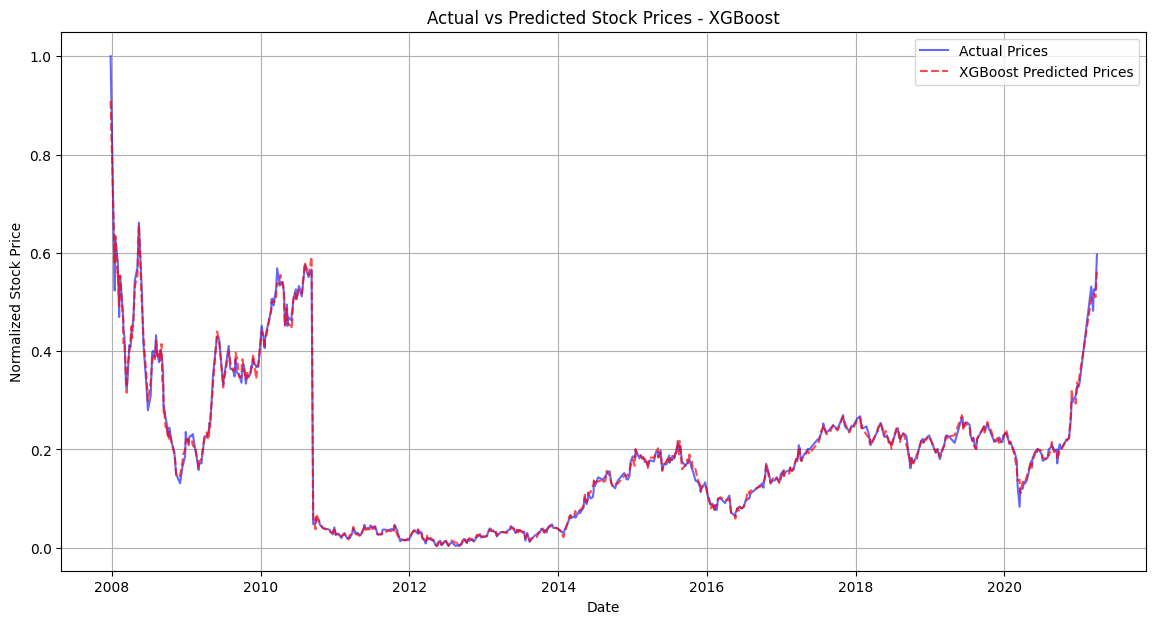

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `y_test` and `y_pred_xgb` are already defined

# Create a DataFrame for results
xgb_results = pd.DataFrame({
    'Date': pca_df['Date'][y_test.index],  # Assuming 'Date' is in `pca_df`
    'Actual': y_test,
    'Predicted': y_pred_xgb
}).sort_values(by='Date')

# Plot Actual vs Predicted Prices for XGBoost
plt.figure(figsize=(14, 7))
plt.plot(xgb_results['Date'], xgb_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(xgb_results['Date'], xgb_results['Predicted'], label='XGBoost Predicted Prices', color='red', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - XGBoost")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Define base models for stacking
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Meta-model (linear regression)
meta_model = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_stack = stacking_model.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)

print(f"Stacking Mean Squared Error: {mse_stack}")
print(f"Stacking R^2 Score: {r2_stack}")
print(f"Stacking Mean Absolute Error: {mae_stack}")


Stacking Mean Squared Error: 0.00010680797755843343
Stacking R^2 Score: 0.9951628744751362
Stacking Mean Absolute Error: 0.004609423305479814


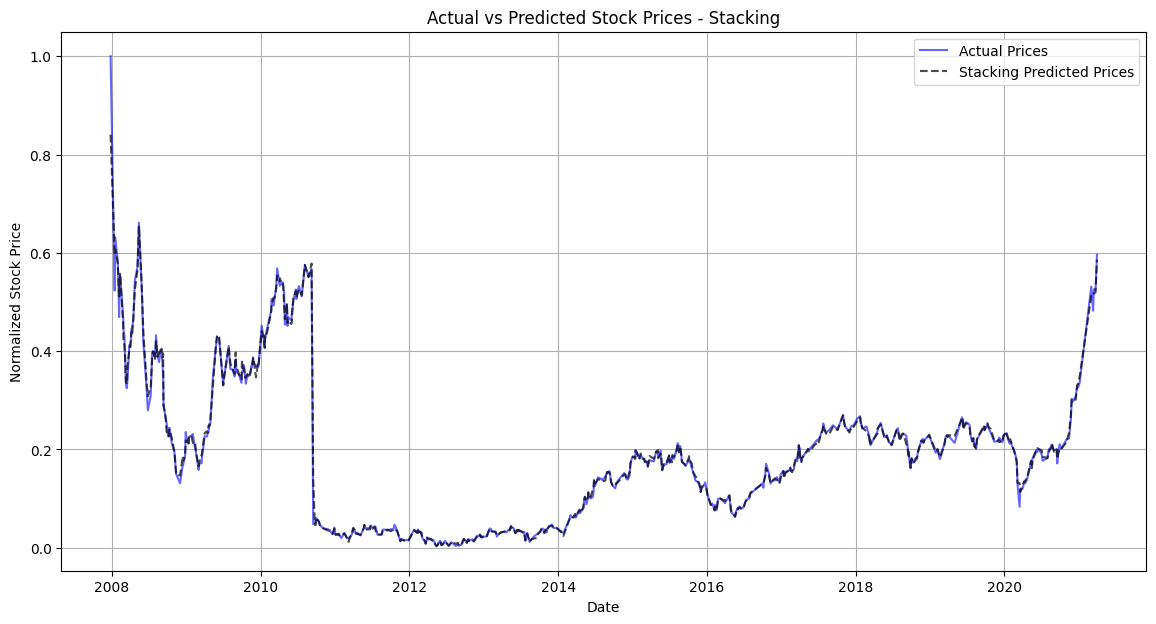

In [8]:
# Assuming `y_test` and `y_pred_stack` are already defined

# Create a DataFrame for results
stacking_results = pd.DataFrame({
    'Date': pca_df['Date'][y_test.index],  # Assuming 'Date' is in `pca_df`
    'Actual': y_test,
    'Predicted': y_pred_stack
}).sort_values(by='Date')

# Plot Actual vs Predicted Prices for Stacking
plt.figure(figsize=(14, 7))
plt.plot(stacking_results['Date'], stacking_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(stacking_results['Date'], stacking_results['Predicted'], label='Stacking Predicted Prices', color='black', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - Stacking")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")

# Create a DataFrame for visualization
rf_results = pd.DataFrame({
    'Date': data['Date'][y_test.index],
    'Actual': y_test,
    'Predicted': y_pred_rf
}).sort_values(by='Date')

# Plot Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(rf_results['Date'], rf_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(rf_results['Date'], rf_results['Predicted'], label='Random Forest Predicted Prices', color='green', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - Random Forest")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()

Random Forest Mean Squared Error: 0.00021711455491524493
Random Forest R^2 Score: 0.9901673041714002
Random Forest Mean Absolute Error: 0.005631034721456862


C:\Users\IDEAPAD GAMING\AppData\Local\Temp\ipykernel_13428\3258638632.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


Random Forest Mean Squared Error: 0.0004279676382545697
Random Forest R^2 Score: 0.9847455270647605
Random Forest Mean Absolute Error: 0.014653676142386196


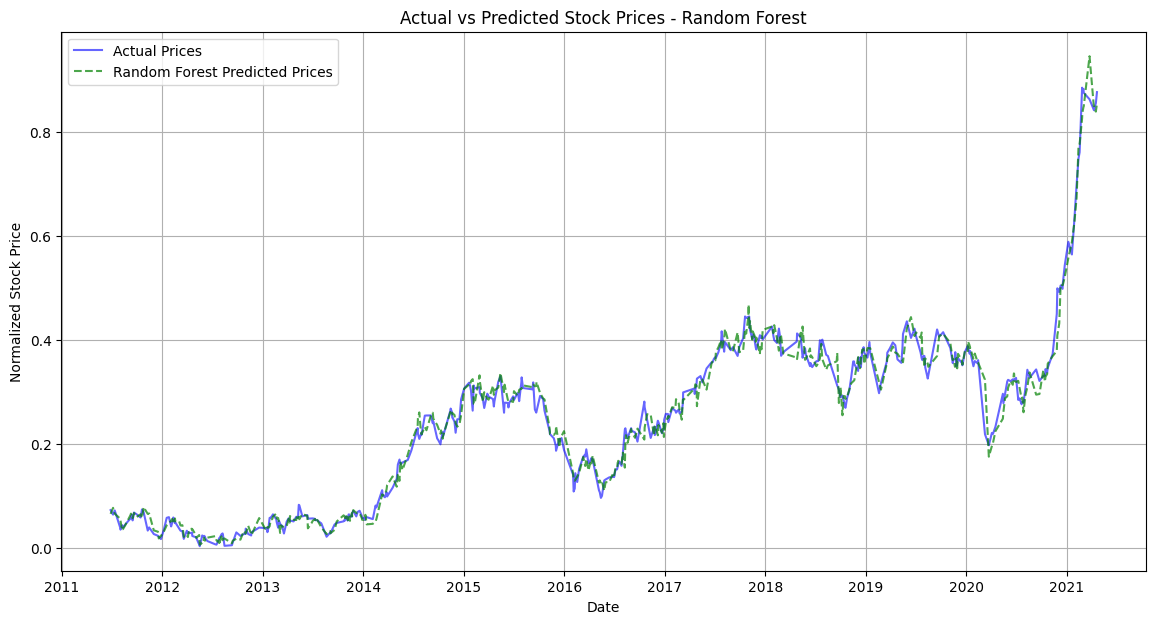

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('D:/Swastick College/7th Sem/Adv Data MIning/ADM LAB/Stock Market Data/ADANIPORTS copy.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Basic feature engineering and normalization
# Adding Technical Indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# RSI Calculation
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data = data.dropna()  # Drop NaN values generated by indicator calculations

# Normalize specific columns
features_to_normalize = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover', 'SMA_20', 'EMA_20', 'RSI', 'MACD']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Define the target using a rolling window
window_size = 5
data['Target'] = data['Close'].shift(-window_size)
data = data.dropna()

# Split data into features and target
X = data[features_to_normalize]
y = data['Target']

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")

# Create a DataFrame for visualization
rf_results = pd.DataFrame({
    'Date': data['Date'][y_test.index],
    'Actual': y_test,
    'Predicted': y_pred_rf
}).sort_values(by='Date')

# Plot Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(rf_results['Date'], rf_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(rf_results['Date'], rf_results['Predicted'], label='Random Forest Predicted Prices', color='green', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - Random Forest")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()


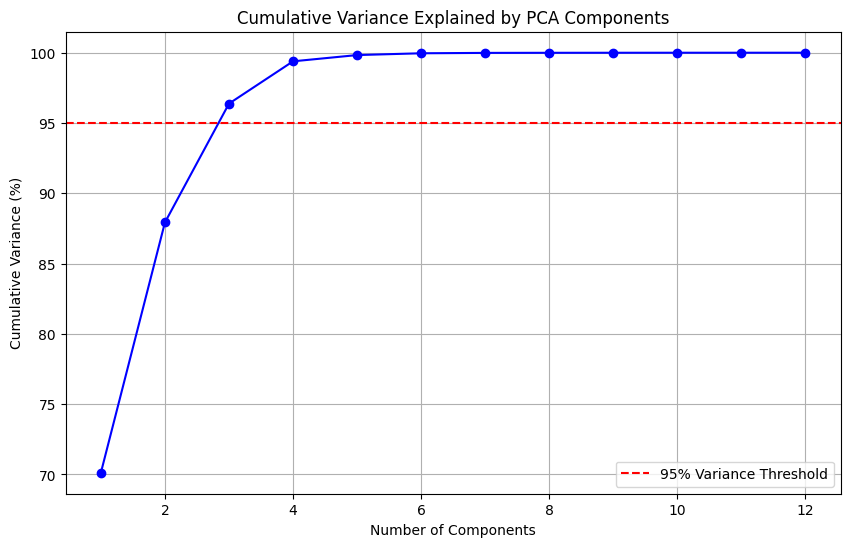

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load your data
data = pd.read_csv('D:\Swastick College/7th Sem\Adv Data MIning\ADM LAB\Stock Market Data\ADANIPORTS copy.csv')

# Preprocess the data (assuming relevant features have been selected)
# Select only numerical columns for PCA and drop any non-numerical columns
features = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(normalized_data)

# Calculate cumulative variance explained by each component
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.axhline(y=95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()
